## Part I: Research Quesiton:    
#### A1. What affects the monthly charge?
#### A2. Goal is to figure out what variables affect, or have the most influence on, the monthly charge. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# Cleaning plan:
1. change columns to lowercase 
        ## columns.str.lower()
2. Drop columns: Interaction, UID, item# as I don't forsee using those  
        # df.drop(['column'], axis=1, inplace=True)
3. Select explanatory variables
4. Re-express any categorical variables
5. Check for outliers

In [4]:
#creating a copy of the original.
df_clean = df.copy()

In [5]:
#1. #lowercase column names and verify
df_clean.columns = df_clean.columns.str.lower()
df_clean.head(1)

,caseorder,customer_id,interaction,uid,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611,5,5,5,3,4,4,3,4


In [6]:
#2. dropping columns and verify
df_clean.drop(['interaction', 'population'], axis=1, inplace=True)
df_clean.drop(['uid'], axis=1, inplace=True)
df_clean.drop(['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'], axis=1, inplace=True)
df_clean.head(1)

,caseorder,customer_id,city,state,county,zip,lat,lng,area,timezone,job,children,age,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year
0,1,K409198,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611


No missing data, as I could see all colums had 10000 rows

Variables I want to use: zip, area (one hot encoding - area_suburban and area_urban), age, income, churn, outage_sec_perweek, contract (ordinal), tablet (ordinal), internetservice (one hot), phone (ordinal), multiple, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies(all ordinal), tenure, bandwidth_gb_year

I am going to drop the columns not using for this analysis and future models.

## Starting exploratory analysis

In [7]:
df_clean.drop(['city', 'state', 'county', 'lat', 'lng', 'timezone', 'job', 'children', 'marital', 'gender', 'email', 'contacts', 'yearly_equip_failure', 'paymentmethod'], axis=1, inplace=True)
df_clean.head(1)

,caseorder,customer_id,zip,area,age,income,churn,outage_sec_perweek,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,tenure,monthlycharge,bandwidth_gb_year
0,1,K409198,99927,Urban,68,28561.99,No,7.978323,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,6.795513,172.455519,904.53611


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   caseorder           10000 non-null  int64  
 1   customer_id         10000 non-null  object 
 2   zip                 10000 non-null  int64  
 3   area                10000 non-null  object 
 4   age                 10000 non-null  int64  
 5   income              10000 non-null  float64
 6   churn               10000 non-null  object 
 7   outage_sec_perweek  10000 non-null  float64
 8   techie              10000 non-null  object 
 9   contract            10000 non-null  object 
 10  port_modem          10000 non-null  object 
 11  tablet              10000 non-null  object 
 12  internetservice     10000 non-null  object 
 13  phone               10000 non-null  object 
 14  multiple            10000 non-null  object 
 15  onlinesecurity      10000 non-null  object 
 16  onlin

In [9]:
df_clean.describe()

,caseorder,zip,age,income,outage_sec_perweek,tenure,monthlycharge,bandwidth_gb_year
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,53.078400,39806.926771,10.001848,34.526188,172.624816,3392.341550
std,2886.89568,27532.196108,20.698882,28199.916702,2.976019,26.443063,42.943094,2185.294852
min,1.00000,601.000000,18.000000,348.670000,0.099747,1.000259,79.978860,155.506715
25%,2500.75000,26292.500000,35.000000,19224.717500,8.018214,7.917694,139.979239,1236.470827
50%,5000.50000,48869.500000,53.000000,33170.605000,10.018560,35.430507,167.484700,3279.536903
75%,7500.25000,71866.500000,71.000000,53246.170000,11.969485,61.479795,200.734725,5586.141370
max,10000.00000,99929.000000,89.000000,258900.700000,21.207230,71.999280,290.160419,7158.981530


### Summary Statistics:
Dataset has 10,000 rows, started with 49 columns, narrowed down to 24.

Minimum monthly charge is $79, max is $290, average charge is around $172 with a standard deviation of $43. 

The average tenure is just shy of 3 years (34 months)

The average income is just under $40,000 ($39,806)

# Univariate / Bivariate analysis of variables

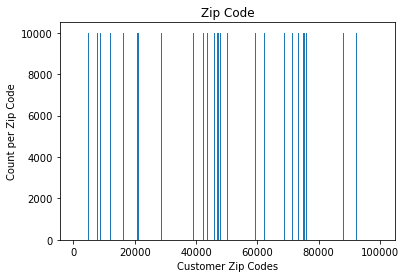

In [10]:
plt.bar(df_clean['zip'], height=df_clean['zip'].count())
plt.xlabel('Customer Zip Codes')
plt.ylabel('Count per Zip Code')
plt.title('Zip Code');

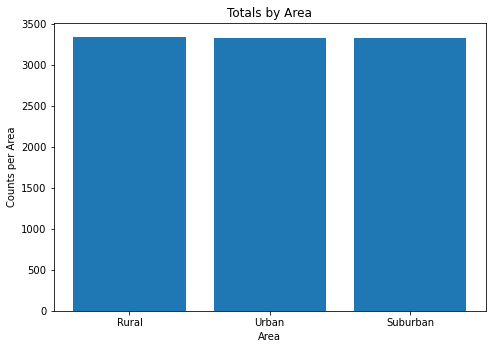

In [11]:
fig=plt.figure()
a = fig.add_axes([0,0,1,1])
areas = ['Rural', 'Urban', 'Suburban']
counts = df_clean['area'].value_counts()
a.bar(areas,counts)
plt.xlabel('Area')
plt.ylabel('Counts per Area')
plt.title('Totals by Area')
plt.show();

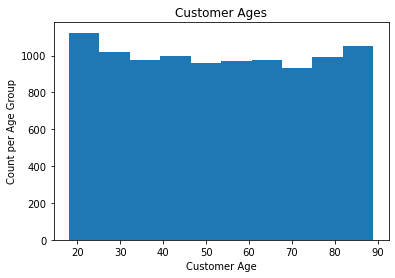

In [12]:
plt.hist(df_clean['age'])
plt.xlabel('Customer Age')
plt.ylabel('Count per Age Group')
plt.title('Customer Ages');

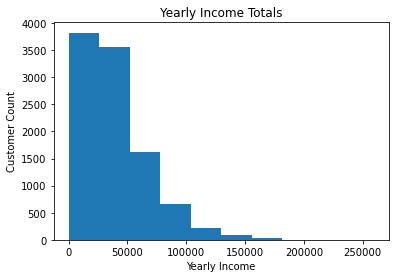

In [13]:
plt.hist(df_clean['income'])
plt.xlabel('Yearly Income')
plt.ylabel('Customer Count')
plt.title('Yearly Income Totals');

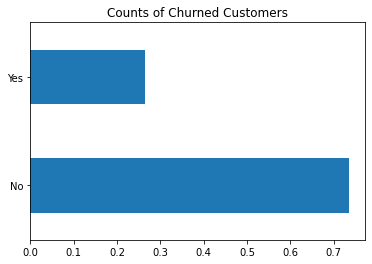

In [14]:
df_clean.churn.value_counts(normalize=True).plot.barh()
plt.title('Counts of Churned Customers')
plt.show()

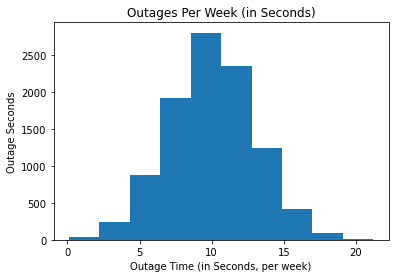

In [15]:
plt.hist(df_clean['outage_sec_perweek'])
plt.xlabel('Outage Time (in Seconds, per week)')
plt.ylabel('Outage Seconds')
plt.title('Outages Per Week (in Seconds)');

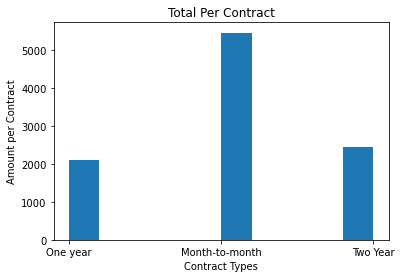

In [16]:
plt.hist(df_clean['contract'])
plt.xlabel('Contract Types')
plt.ylabel('Amount per Contract')
plt.title('Total Per Contract');

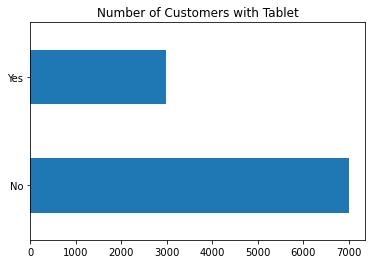

In [17]:
df_clean.tablet.value_counts().plot.barh()
plt.title('Number of Customers with Tablet')
plt.show()

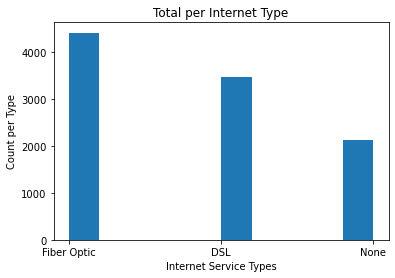

In [18]:
plt.hist(df_clean['internetservice'])
plt.xlabel('Internet Service Types')
plt.ylabel('Count per Type')
plt.title('Total per Internet Type');

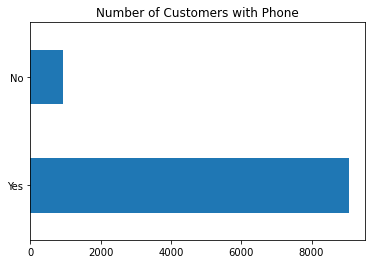

In [19]:
df_clean.phone.value_counts().plot.barh()
plt.title('Number of Customers with Phone')
plt.show()

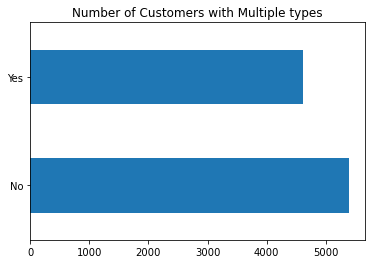

In [20]:
df_clean.multiple.value_counts().plot.barh()
plt.title('Number of Customers with Multiple types')
plt.show();

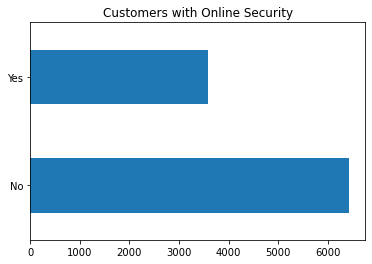

In [21]:
df_clean.onlinesecurity.value_counts().plot.barh()
plt.title('Customers with Online Security')
plt.show();

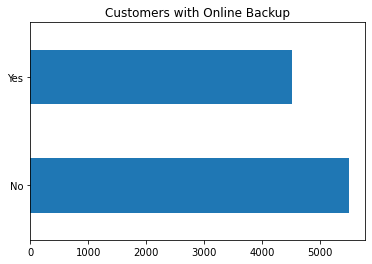

In [22]:
df_clean.onlinebackup.value_counts().plot.barh()
plt.title('Customers with Online Backup')
plt.show();

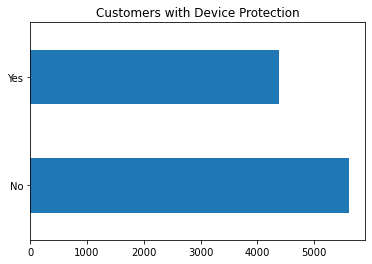

In [23]:
df_clean.deviceprotection.value_counts().plot.barh()
plt.title('Customers with Device Protection')
plt.show();

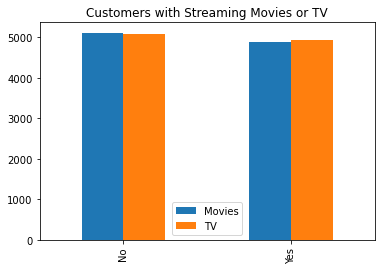

In [24]:
df = pd.DataFrame({'Movies': df_clean.streamingmovies.value_counts(), 
                 'TV': df_clean.streamingtv.value_counts()})
ax = df.plot.bar()
plt.title('Customers with Streaming Movies or TV');

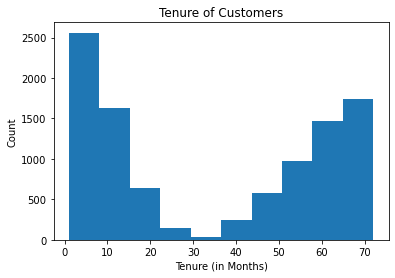

In [25]:
plt.hist(df_clean['tenure'])
plt.xlabel('Tenure (in Months)')
plt.ylabel('Count')
plt.title('Tenure of Customers');

Tenure histogram is a bell curve (not normal distribution)

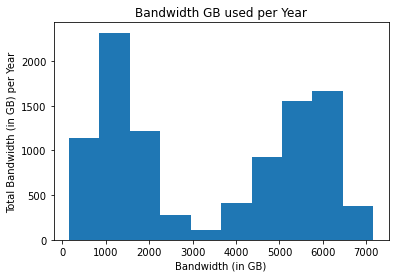

In [26]:
plt.hist(df_clean['bandwidth_gb_year'])
plt.xlabel('Bandwidth (in GB)')
plt.ylabel('Total Bandwidth (in GB) per Year')
plt.title('Bandwidth GB used per Year');

### Bivariate analysis

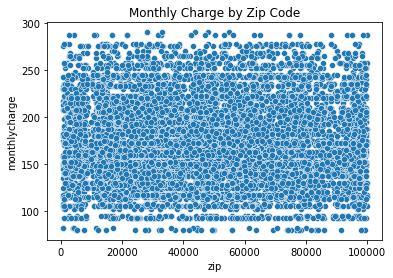

In [27]:
import seaborn as sns
sns.scatterplot( data=df_clean, x='zip', y='monthlycharge')
plt.title('Monthly Charge by Zip Code')
plt.show()

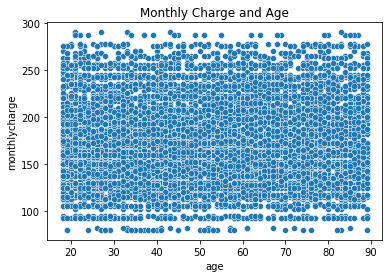

In [28]:
sns.scatterplot(data=df_clean, x='age', y='monthlycharge')
plt.title('Monthly Charge and Age');

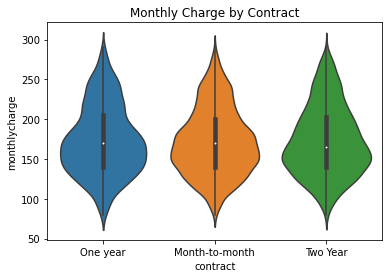

In [29]:
sns.violinplot(x='contract', y='monthlycharge', data=df_clean)
plt.title('Monthly Charge by Contract');

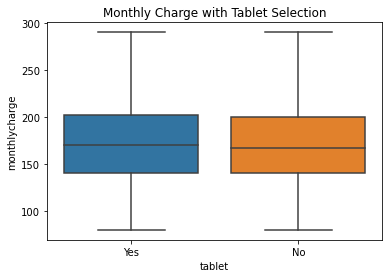

In [30]:
sns.boxplot(x='tablet', y='monthlycharge', data=df_clean)
plt.title('Monthly Charge with Tablet Selection');

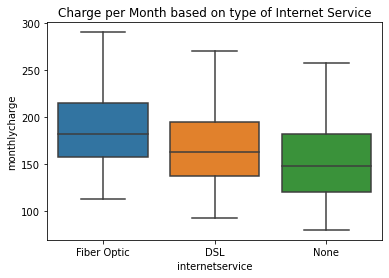

In [31]:
sns.boxplot(x='internetservice', y='monthlycharge', data=df_clean)
plt.title('Charge per Month based on type of Internet Service')
plt.show()

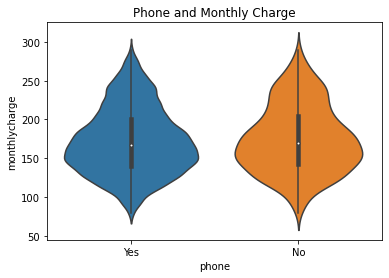

In [32]:
sns.violinplot(x='phone', y='monthlycharge', data=df_clean)
plt.title('Phone and Monthly Charge')
plt.show()

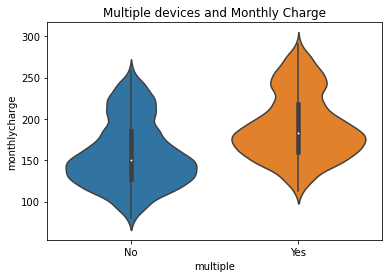

In [33]:
sns.violinplot(x='multiple', y='monthlycharge', data=df_clean)
plt.title('Multiple devices and Monthly Charge');

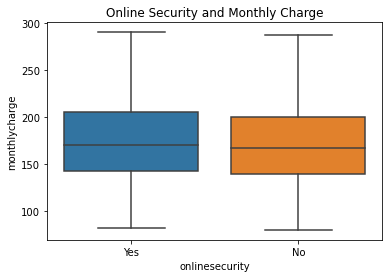

In [34]:
sns.boxplot(x='onlinesecurity', y='monthlycharge', data=df_clean)
plt.title('Online Security and Monthly Charge')
plt.show()

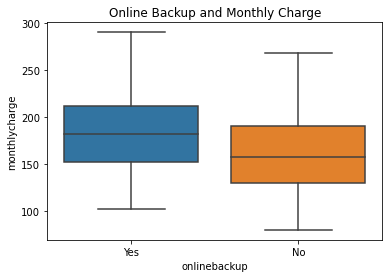

In [35]:
sns.boxplot(x='onlinebackup', y='monthlycharge', data=df_clean)
plt.title('Online Backup and Monthly Charge')
plt.show()

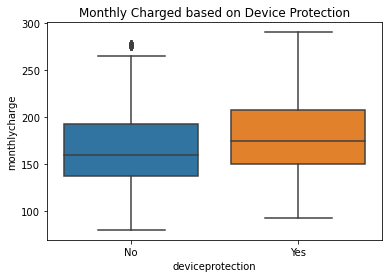

In [36]:
sns.boxplot(x='deviceprotection', y='monthlycharge', data=df_clean)
plt.title('Monthly Charged based on Device Protection');

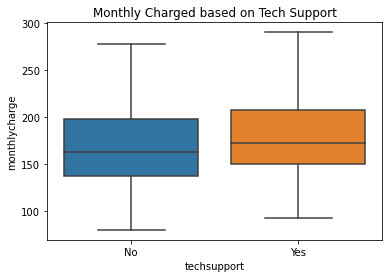

In [37]:
sns.boxplot(x='techsupport', y='monthlycharge', data=df_clean)
plt.title('Monthly Charged based on Tech Support');

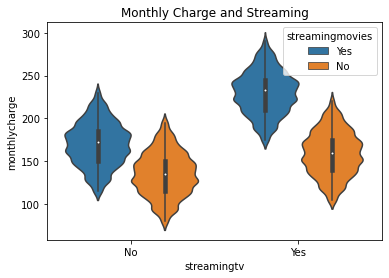

In [38]:
sns.violinplot(data=df_clean, x='streamingtv', y='monthlycharge', hue='streamingmovies')
plt.title('Monthly Charge and Streaming');

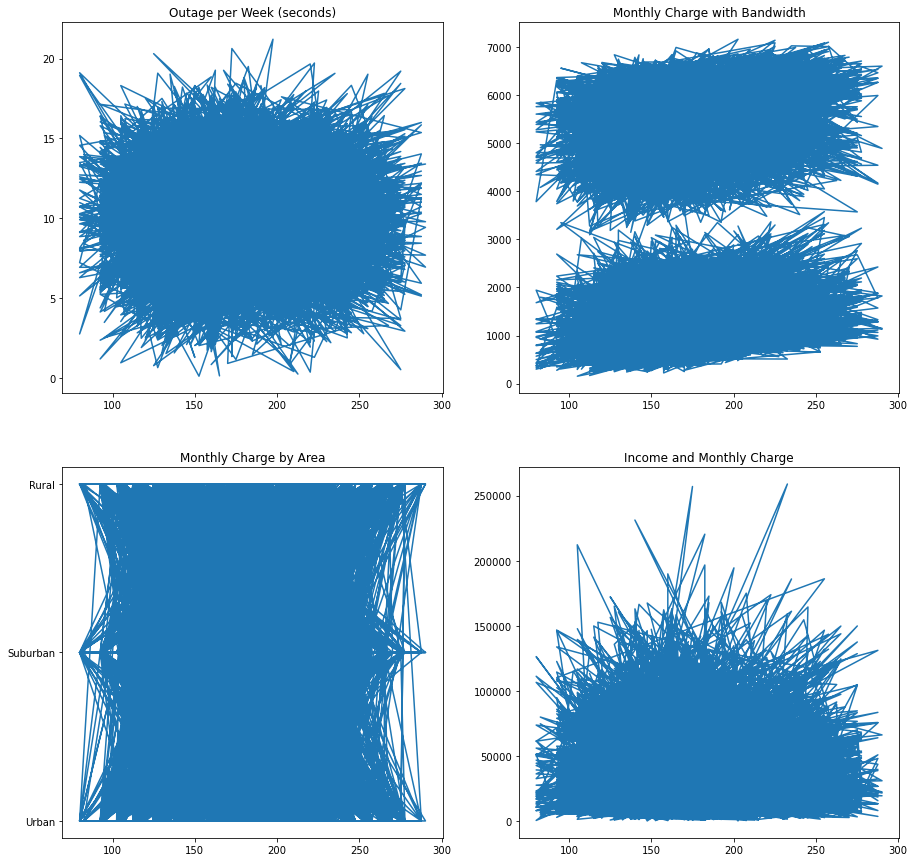

In [39]:
figure, axis = plt.subplots(2,2,figsize=(15,15))
axis[0,0].plot(df_clean.monthlycharge, df_clean.outage_sec_perweek)
axis[0,0].set_title("Outage per Week (seconds)")
axis[0,1].plot(df_clean.monthlycharge, df_clean.bandwidth_gb_year)
axis[0,1].set_title("Monthly Charge with Bandwidth")
axis[1,0].plot(df_clean.monthlycharge, df_clean.area)
axis[1,0].set_title("Monthly Charge by Area")
axis[1,1].plot(df_clean.monthlycharge, df_clean.income)
axis[1,1].set_title("Income and Monthly Charge")
plt.show()

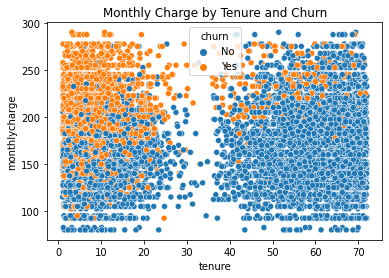

In [40]:
sns.scatterplot(data=df_clean, y="monthlycharge", x='tenure', hue='churn')
plt.title('Monthly Charge by Tenure and Churn');

In [41]:
df_clean.corr()

,caseorder,zip,age,income,outage_sec_perweek,tenure,monthlycharge,bandwidth_gb_year
caseorder,1.000000,0.003007,0.016038,0.000192,-0.001358,0.832550,0.003677,0.825561
zip,0.003007,1.000000,-0.008135,0.002947,-0.011520,-0.003227,-0.008717,-0.002527
age,0.016038,-0.008135,1.000000,-0.004091,-0.008047,0.016979,0.010729,-0.014724
income,0.000192,0.002947,-0.004091,1.000000,-0.010011,0.002114,-0.003014,0.003674
outage_sec_perweek,-0.001358,-0.011520,-0.008047,-0.010011,1.000000,0.002932,0.020496,0.004176
tenure,0.832550,-0.003227,0.016979,0.002114,0.002932,1.000000,-0.003337,0.991495
monthlycharge,0.003677,-0.008717,0.010729,-0.003014,0.020496,-0.003337,1.000000,0.060406
bandwidth_gb_year,0.825561,-0.002527,-0.014724,0.003674,0.004176,0.991495,0.060406,1.000000


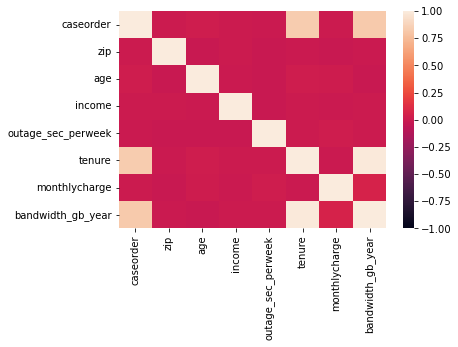

In [42]:
sns.heatmap(df_clean.corr(), vmin=-1, vmax=1);

I don't see a lot of strong correlations amongst the variables.

## Re-expressing categorical variables
yes = 1, no = 0

In [43]:
df_clean['churn'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['churn'].unique()

array([0, 1], dtype=int64)

In [44]:
df_clean['techie'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['port_modem'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['tablet'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['phone'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['multiple'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['onlinesecurity'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['onlinebackup'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['deviceprotection'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['techsupport'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['streamingtv'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['streamingmovies'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean['paperlessbilling'].replace(['Yes', 'No'], [1,0], inplace=True)
df_clean.head()

,caseorder,customer_id,zip,area,age,income,churn,outage_sec_perweek,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,tenure,monthlycharge,bandwidth_gb_year
0,1,K409198,99927,Urban,68,28561.99,0,7.978323,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110
1,2,S120509,48661,Urban,27,21704.77,1,11.699080,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766
2,3,K191035,97148,Urban,50,9609.57,0,10.752800,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961
3,4,D90850,92014,Suburban,48,18925.23,0,14.913540,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412
4,5,K662701,77461,Suburban,83,40074.19,1,8.147417,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436


In [45]:
categories = ['area', 'contract', 'internetservice']
dummies = pd.get_dummies(df_clean[categories], drop_first=True)
df_clean = pd.concat([df_clean, dummies], axis=1)
df_clean.drop(['area', 'contract', 'internetservice'], axis=1, inplace=True)
df_clean.head()

,caseorder,customer_id,zip,age,income,churn,outage_sec_perweek,techie,port_modem,tablet,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,tenure,monthlycharge,bandwidth_gb_year,area_Suburban,area_Urban,contract_One year,contract_Two Year,internetservice_Fiber Optic,internetservice_None
0,1,K409198,99927,68,28561.99,0,7.978323,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,0,1,1,0,1,0
1,2,S120509,48661,27,21704.77,1,11.699080,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,0,1,0,0,1,0
2,3,K191035,97148,50,9609.57,0,10.752800,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,0,1,0,1,0,0
3,4,D90850,92014,48,18925.23,0,14.913540,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,1,0,0,1,0,0
4,5,K662701,77461,83,40074.19,1,8.147417,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,1,0,0,0,1,0


In [46]:
#lowercase the new column headers
df_clean.columns = df_clean.columns.str.lower()
df_clean.head()

,caseorder,customer_id,zip,age,income,churn,outage_sec_perweek,techie,port_modem,tablet,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,tenure,monthlycharge,bandwidth_gb_year,area_suburban,area_urban,contract_one year,contract_two year,internetservice_fiber optic,internetservice_none
0,1,K409198,99927,68,28561.99,0,7.978323,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,0,1,1,0,1,0
1,2,S120509,48661,27,21704.77,1,11.699080,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,0,1,0,0,1,0
2,3,K191035,97148,50,9609.57,0,10.752800,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,0,1,0,1,0,0
3,4,D90850,92014,48,18925.23,0,14.913540,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,1,0,0,1,0,0
4,5,K662701,77461,83,40074.19,1,8.147417,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,1,0,0,0,1,0


In [47]:
# remove spacing/inconsistencies with the new columns
df_clean.columns = df_clean.columns.str.replace(' ', '')
df_clean.head()

,caseorder,customer_id,zip,age,income,churn,outage_sec_perweek,techie,port_modem,tablet,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,tenure,monthlycharge,bandwidth_gb_year,area_suburban,area_urban,contract_oneyear,contract_twoyear,internetservice_fiberoptic,internetservice_none
0,1,K409198,99927,68,28561.99,0,7.978323,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,0,1,1,0,1,0
1,2,S120509,48661,27,21704.77,1,11.699080,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,0,1,0,0,1,0
2,3,K191035,97148,50,9609.57,0,10.752800,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,0,1,0,1,0,0
3,4,D90850,92014,48,18925.23,0,14.913540,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,1,0,0,1,0,0
4,5,K662701,77461,83,40074.19,1,8.147417,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,1,0,0,0,1,0


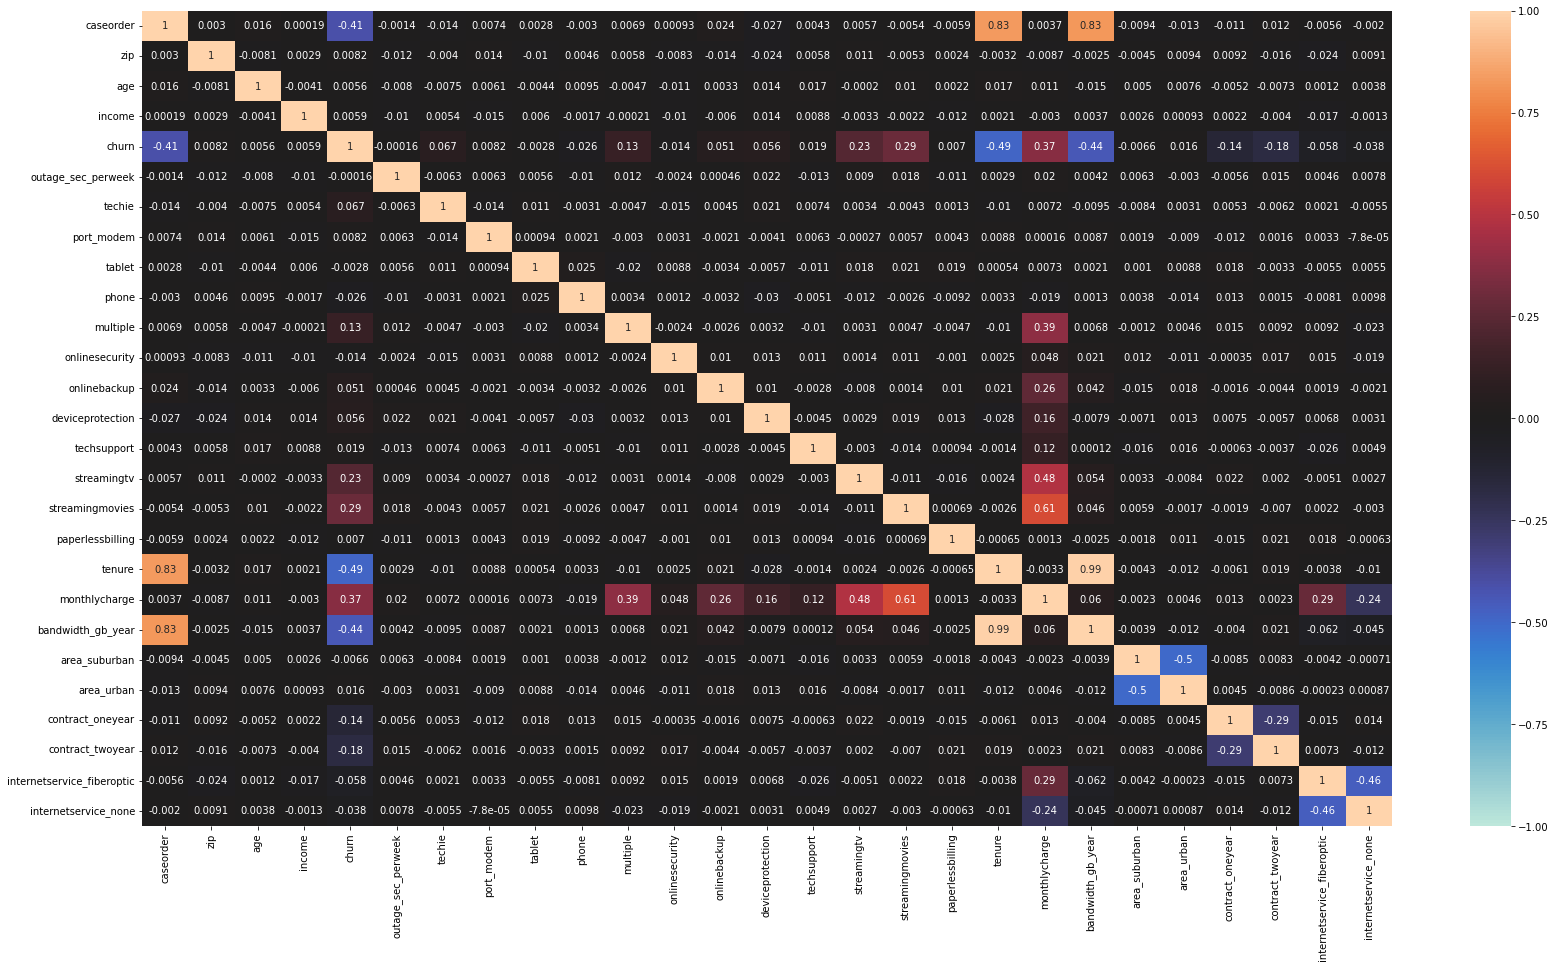

In [48]:
#putting heatmap again for the dummy variables
plt.figure(figsize=(28,15))
sns.heatmap(df_clean.corr(), annot=True, center=0, vmin=-1, vmax=1);

# Ready for Initial Model

In [49]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot

model = ols('monthlycharge ~ zip + age + income + churn + outage_sec_perweek + tablet + phone + multiple + onlinesecurity + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + bandwidth_gb_year + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthlycharge   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.296e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:38:55   Log-Likelihood:                -35312.
No. Observations:               10000   AIC:                         7.067e+04
Df Residuals:                    9979   BIC:                         7.082e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     59.8363      0.888     67.388      0.000      58.096      61.577
zip                         2.227e-06   3.01e-06      0.740      0.459   -3.67e-06    8.13e-06
age                            0.1204      0.005     22.547      0.000       0.110       0.131
income                      3.177e-06   2.94e-06      1.082      0.279   -2.58e-06    8.93e-06
churn                          3.0835      0.260     11.882      0.000       2.575       3.592
outage_sec_perweek            -0.0143      0.028     -0.512      0.609      -0.069       0.040
tablet                        -0.1139      0.181     -0.629      0.529      -0.469       0.241
phone                         -0.3939      0.285     -1.383      0.167      -0.952       0.165
multiple                      29.8206      0.183    162.812      0.000      29.462      30.180
onlinesecurity                -0.0195      0.191     -0.102      0.919      -0.395       0.356
onlinebackup                  19.1200      0.193     98.816      0.000      18.741      19.499
deviceprotection               9.3559      0.191     49.086      0.000       8.982       9.729
techsupport                   12.3557      0.171     72.163      0.000      12.020      12.691
streamingmovies               44.1202      0.283    156.083      0.000      43.566      44.674
streamingtv                   33.5237      0.295    113.746      0.000      32.946      34.101
tenure                        -2.8517      0.087    -32.927      0.000      -3.021      -2.682
bandwidth_gb_year              0.0351      0.001     33.277      0.000       0.033       0.037
contract_oneyear               0.8489      0.221      3.837      0.000       0.415       1.283
contract_twoyear               0.7274      0.211      3.447      0.001       0.314       1.141
internetservice_fiberoptic    34.6938      0.476     72.889      0.000      33.761      35.627
internetservice_none           1.9289      0.492      3.923      0.000       0.965       2.893
==============================================================================
Omnibus:                    53750.875   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1008.035
Skew:                          -0.015   Prob(JB):                    1.28e-219
Kurtosis:                       1.445   Cond. No.                     9.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Reducing model
### Using backward stepwise variable elmination

In [50]:
#removing onlinesecurity as it was the highest p-value

model = ols('monthlycharge ~ zip + age + income + churn + outage_sec_perweek + tablet + phone + multiple + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + bandwidth_gb_year + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthlycharge   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.365e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:38:55   Log-Likelihood:                -35312.
No. Observations:               10000   AIC:                         7.066e+04
Df Residuals:                    9980   BIC:                         7.081e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     59.8605      0.855     69.979      0.000      58.184      61.537
zip                         2.227e-06   3.01e-06      0.740      0.459   -3.67e-06    8.13e-06
age                            0.1202      0.005     23.435      0.000       0.110       0.130
income                       3.18e-06   2.94e-06      1.083      0.279   -2.57e-06    8.94e-06
churn                          3.0845      0.259     11.895      0.000       2.576       3.593
outage_sec_perweek            -0.0142      0.028     -0.512      0.609      -0.069       0.040
tablet                        -0.1141      0.181     -0.630      0.528      -0.469       0.241
phone                         -0.3940      0.285     -1.383      0.167      -0.953       0.164
multiple                      29.8237      0.181    165.141      0.000      29.470      30.178
onlinebackup                  19.1241      0.189    101.051      0.000      18.753      19.495
deviceprotection               9.3596      0.187     50.066      0.000       8.993       9.726
techsupport                   12.3556      0.171     72.166      0.000      12.020      12.691
streamingmovies               44.1295      0.267    165.033      0.000      43.605      44.654
streamingtv                   33.5339      0.277    121.114      0.000      32.991      34.077
tenure                        -2.8479      0.078    -36.414      0.000      -3.001      -2.695
bandwidth_gb_year              0.0351      0.001     36.803      0.000       0.033       0.037
contract_oneyear               0.8492      0.221      3.838      0.000       0.416       1.283
contract_twoyear               0.7275      0.211      3.448      0.001       0.314       1.141
internetservice_fiberoptic    34.6747      0.437     79.325      0.000      33.818      35.532
internetservice_none           1.9102      0.456      4.188      0.000       1.016       2.804
==============================================================================
Omnibus:                    53660.053   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.141
Skew:                          -0.015   Prob(JB):                    7.37e-220
Kurtosis:                       1.444   Cond. No.                     8.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#removing outage_sec_perweek as it was the highest p-value

model = ols('monthlycharge ~ zip + age + income + churn + tablet + phone + multiple + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + bandwidth_gb_year + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthlycharge   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.441e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:38:55   Log-Likelihood:                -35312.
No. Observations:               10000   AIC:                         7.066e+04
Df Residuals:                    9981   BIC:                         7.080e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     59.7179      0.809     73.842      0.000      58.133      61.303
zip                         2.243e-06   3.01e-06      0.745      0.456   -3.66e-06    8.14e-06
age                            0.1203      0.005     23.439      0.000       0.110       0.130
income                      3.195e-06   2.94e-06      1.088      0.276   -2.56e-06    8.95e-06
churn                          3.0854      0.259     11.900      0.000       2.577       3.594
tablet                        -0.1146      0.181     -0.633      0.527      -0.469       0.240
phone                         -0.3926      0.285     -1.378      0.168      -0.951       0.166
multiple                      29.8226      0.181    165.152      0.000      29.469      30.177
onlinebackup                  19.1241      0.189    101.055      0.000      18.753      19.495
deviceprotection               9.3578      0.187     50.067      0.000       8.991       9.724
techsupport                   12.3567      0.171     72.180      0.000      12.021      12.692
streamingmovies               44.1280      0.267    165.043      0.000      43.604      44.652
streamingtv                   33.5332      0.277    121.117      0.000      32.990      34.076
tenure                        -2.8479      0.078    -36.415      0.000      -3.001      -2.695
bandwidth_gb_year              0.0351      0.001     36.804      0.000       0.033       0.037
contract_oneyear               0.8496      0.221      3.840      0.000       0.416       1.283
contract_twoyear               0.7263      0.211      3.443      0.001       0.313       1.140
internetservice_fiberoptic    34.6736      0.437     79.326      0.000      33.817      35.530
internetservice_none           1.9086      0.456      4.185      0.000       1.015       2.803
==============================================================================
Omnibus:                    53654.421   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.212
Skew:                          -0.015   Prob(JB):                    7.12e-220
Kurtosis:                       1.444   Cond. No.                     8.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#removing tablet as it was the highest p-value

model = ols('monthlycharge ~ zip + age + income + churn + phone + multiple + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + bandwidth_gb_year + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthlycharge   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.525e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:38:55   Log-Likelihood:                -35312.
No. Observations:               10000   AIC:                         7.066e+04
Df Residuals:                    9982   BIC:                         7.079e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     59.6858      0.807     73.950      0.000      58.104      61.268
zip                         2.263e-06   3.01e-06      0.752      0.452   -3.63e-06    8.16e-06
age                            0.1203      0.005     23.443      0.000       0.110       0.130
income                      3.184e-06   2.94e-06      1.084      0.278   -2.57e-06    8.94e-06
churn                          3.0868      0.259     11.906      0.000       2.579       3.595
phone                         -0.3970      0.285     -1.394      0.163      -0.955       0.161
multiple                      29.8245      0.181    165.190      0.000      29.471      30.178
onlinebackup                  19.1243      0.189    101.059      0.000      18.753      19.495
deviceprotection               9.3583      0.187     50.072      0.000       8.992       9.725
techsupport                   12.3578      0.171     72.193      0.000      12.022      12.693
streamingmovies               44.1252      0.267    165.061      0.000      43.601      44.649
streamingtv                   33.5306      0.277    121.124      0.000      32.988      34.073
tenure                        -2.8479      0.078    -36.417      0.000      -3.001      -2.695
bandwidth_gb_year              0.0351      0.001     36.806      0.000       0.033       0.037
contract_oneyear               0.8475      0.221      3.832      0.000       0.414       1.281
contract_twoyear               0.7264      0.211      3.443      0.001       0.313       1.140
internetservice_fiberoptic    34.6747      0.437     79.332      0.000      33.818      35.531
internetservice_none           1.9089      0.456      4.186      0.000       1.015       2.803
==============================================================================
Omnibus:                    53605.833   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.812
Skew:                          -0.015   Prob(JB):                    5.27e-220
Kurtosis:                       1.443   Cond. No.                     8.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#removing zip as it was the highest p-value

model = ols('monthlycharge ~ age + income + churn + phone + multiple + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + bandwidth_gb_year + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthlycharge   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.621e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:38:55   Log-Likelihood:                -35313.
No. Observations:               10000   AIC:                         7.066e+04
Df Residuals:                    9983   BIC:                         7.078e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     59.8096      0.790     75.696      0.000      58.261      61.358
age                            0.1202      0.005     23.434      0.000       0.110       0.130
income                      3.189e-06   2.94e-06      1.086      0.277   -2.57e-06    8.94e-06
churn                          3.0878      0.259     11.910      0.000       2.580       3.596
phone                         -0.3962      0.285     -1.391      0.164      -0.954       0.162
multiple                      29.8261      0.181    165.214      0.000      29.472      30.180
onlinebackup                  19.1238      0.189    101.059      0.000      18.753      19.495
deviceprotection               9.3564      0.187     50.067      0.000       8.990       9.723
techsupport                   12.3585      0.171     72.200      0.000      12.023      12.694
streamingmovies               44.1273      0.267    165.082      0.000      43.603      44.651
streamingtv                   33.5349      0.277    121.168      0.000      32.992      34.077
tenure                        -2.8468      0.078    -36.410      0.000      -3.000      -2.694
bandwidth_gb_year              0.0350      0.001     36.799      0.000       0.033       0.037
contract_oneyear               0.8485      0.221      3.836      0.000       0.415       1.282
contract_twoyear               0.7246      0.211      3.435      0.001       0.311       1.138
internetservice_fiberoptic    34.6659      0.437     79.342      0.000      33.809      35.522
internetservice_none           1.9029      0.456      4.173      0.000       1.009       2.797
==============================================================================
Omnibus:                    53588.549   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.028
Skew:                          -0.015   Prob(JB):                    4.73e-220
Kurtosis:                       1.443   Cond. No.                     5.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#removing income as it was the highest p-value

model = ols('monthlycharge ~ age + churn + phone + multiple + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + bandwidth_gb_year + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthlycharge   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:38:55   Log-Likelihood:                -35313.
No. Observations:               10000   AIC:                         7.066e+04
Df Residuals:                    9984   BIC:                         7.077e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     59.9409      0.781     76.766      0.000      58.410      61.472
age                            0.1202      0.005     23.428      0.000       0.110       0.130
churn                          3.0901      0.259     11.919      0.000       2.582       3.598
phone                         -0.3966      0.285     -1.392      0.164      -0.955       0.162
multiple                      29.8260      0.181    165.212      0.000      29.472      30.180
onlinebackup                  19.1229      0.189    101.054      0.000      18.752      19.494
deviceprotection               9.3593      0.187     50.087      0.000       8.993       9.726
techsupport                   12.3600      0.171     72.210      0.000      12.025      12.696
streamingmovies               44.1270      0.267    165.079      0.000      43.603      44.651
streamingtv                   33.5346      0.277    121.166      0.000      32.992      34.077
tenure                        -2.8465      0.078    -36.406      0.000      -3.000      -2.693
bandwidth_gb_year              0.0350      0.001     36.795      0.000       0.033       0.037
contract_oneyear               0.8493      0.221      3.840      0.000       0.416       1.283
contract_twoyear               0.7244      0.211      3.434      0.001       0.311       1.138
internetservice_fiberoptic    34.6606      0.437     79.334      0.000      33.804      35.517
internetservice_none           1.8990      0.456      4.165      0.000       1.005       2.793
==============================================================================
Omnibus:                    53593.838   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.972
Skew:                          -0.015   Prob(JB):                    4.87e-220
Kurtosis:                       1.443   Cond. No.                     4.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#removing phone as it was the highest p-value

model = ols('monthlycharge ~ age + churn + multiple + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + bandwidth_gb_year + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthlycharge   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.852e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:38:55   Log-Likelihood:                -35314.
No. Observations:               10000   AIC:                         7.066e+04
Df Residuals:                    9985   BIC:                         7.077e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     59.5739      0.735     81.051      0.000      58.133      61.015
age                            0.1201      0.005     23.419      0.000       0.110       0.130
churn                          3.0985      0.259     11.954      0.000       2.590       3.607
multiple                      29.8239      0.181    165.199      0.000      29.470      30.178
onlinebackup                  19.1227      0.189    101.048      0.000      18.752      19.494
deviceprotection               9.3656      0.187     50.133      0.000       8.999       9.732
techsupport                   12.3612      0.171     72.214      0.000      12.026      12.697
streamingmovies               44.1242      0.267    165.066      0.000      43.600      44.648
streamingtv                   33.5345      0.277    121.160      0.000      32.992      34.077
tenure                        -2.8469      0.078    -36.409      0.000      -3.000      -2.694
bandwidth_gb_year              0.0350      0.001     36.800      0.000       0.033       0.037
contract_oneyear               0.8470      0.221      3.830      0.000       0.413       1.281
contract_twoyear               0.7249      0.211      3.436      0.001       0.311       1.138
internetservice_fiberoptic    34.6647      0.437     79.341      0.000      33.808      35.521
internetservice_none           1.8999      0.456      4.167      0.000       1.006       2.794
==============================================================================
Omnibus:                    53547.613   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.565
Skew:                          -0.015   Prob(JB):                    3.62e-220
Kurtosis:                       1.443   Cond. No.                     4.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# checking for multicollinearity after reducing initially

from statsmodels.stats.outliers_influence import variance_inflation_factor

x_int = df_clean[['age', 'churn', 'multiple', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingmovies', 'streamingtv', 'tenure', 'bandwidth_gb_year', 'contract_oneyear', 'contract_twoyear', 'internetservice_fiberoptic', 'internetservice_none']]
vif = pd.DataFrame()
vif['Features'] = x_int.columns
vif['VIF'] = [variance_inflation_factor(x_int.values, i) for i in range(x_int.shape[1])]
vif

,Features,VIF
0,age,5.110075
1,churn,2.576614
2,multiple,2.071628
3,onlinebackup,2.090815
4,deviceprotection,2.015485
5,techsupport,1.598161
6,streamingmovies,3.146251
7,streamingtv,3.248817
8,tenure,419.878114
9,bandwidth_gb_year,497.493215


## The above shows high multicollinearity with the bandwidth_gb_year column, so I will be removing that column from the model and rerunning.

In [57]:
x_int = df_clean[['age', 'churn', 'multiple', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingmovies', 'streamingtv', 'tenure', 'contract_oneyear', 'contract_twoyear', 'internetservice_fiberoptic', 'internetservice_none']]
vif = pd.DataFrame()
vif['Features'] = x_int.columns
vif['VIF'] = [variance_inflation_factor(x_int.values, i) for i in range(x_int.shape[1])]
vif

,Features,VIF
0,age,4.985837
1,churn,2.399515
2,multiple,1.860911
3,onlinebackup,1.773408
4,deviceprotection,1.729385
5,techsupport,1.551854
6,streamingmovies,2.240056
7,streamingtv,2.150552
8,tenure,3.276425
9,contract_oneyear,1.418984


### rerunning model with reduced explanatory variables
model = ols('monthlycharge ~ age + churn + multiple + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

In [58]:
#removing age since it's p-value is now higher than cutoff
model = ols('monthlycharge ~ churn + multiple + onlinebackup + deviceprotection + techsupport + streamingmovies + streamingtv + tenure + contract_oneyear + contract_twoyear + internetservice_fiberoptic + internetservice_none', data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthlycharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.893e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:38:55   Log-Likelihood:                -35950.
No. Observations:               10000   AIC:                         7.193e+04
Df Residuals:                    9987   BIC:                         7.202e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     83.4005      0.305    273.498      0.000      82.803      83.998
churn                          3.5015      0.276     12.690      0.000       2.961       4.042
multiple                      32.1850      0.180    179.003      0.000      31.833      32.537
onlinebackup                  22.4020      0.178    125.928      0.000      22.053      22.751
deviceprotection              12.4396      0.178     69.864      0.000      12.091      12.789
techsupport                   12.5249      0.182     68.702      0.000      12.168      12.882
streamingmovies               51.4585      0.190    271.071      0.000      51.086      51.831
streamingtv                   41.4437      0.186    223.032      0.000      41.079      41.808
tenure                         0.0272      0.004      6.791      0.000       0.019       0.035
contract_oneyear               1.0555      0.236      4.480      0.000       0.594       1.517
contract_twoyear               1.0438      0.225      4.647      0.000       0.603       1.484
internetservice_fiberoptic    20.1775      0.202     99.948      0.000      19.782      20.573
internetservice_none         -12.6040      0.244    -51.593      0.000     -13.083     -12.125
==============================================================================
Omnibus:                    37744.770   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1435.919
Skew:                           0.022   Prob(JB):                         0.00
Kurtosis:                       1.144   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#finding RSE on the reduced model 
rse_length = np.sqrt(model.mse_resid)
print("RSE: ", rse_length)

RSE:  8.81737345032135


In [60]:
#coefficient of determination (ie, goodness of fit)
coef = model.rsquared
print("Coefficient of Determination: ", coef)

Coefficient of Determination:  0.9578914500269391


## Vsualizing the residual plots
#### One group for each variable in the model

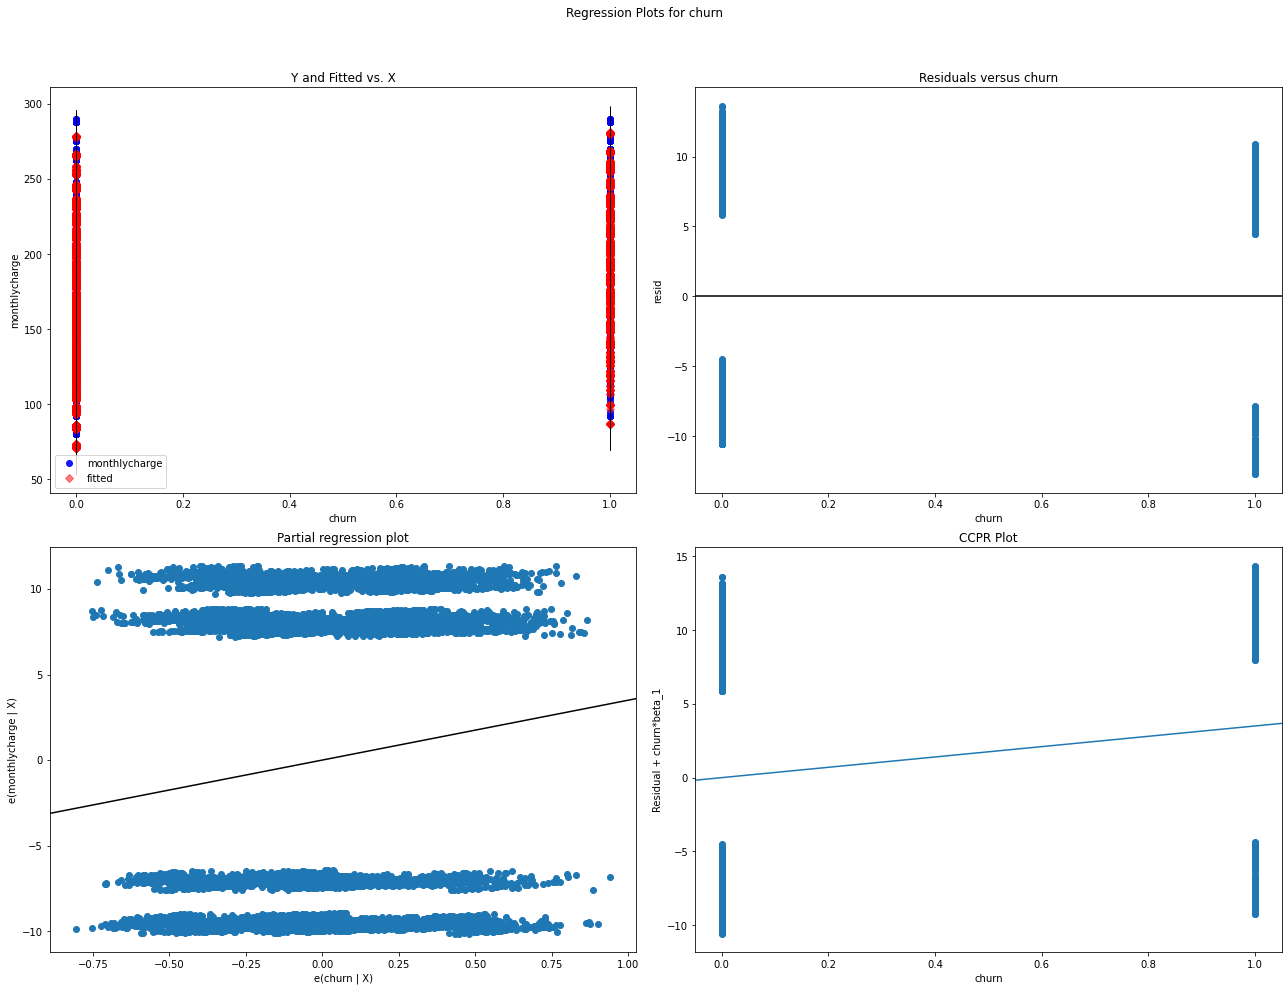

In [61]:
import statsmodels.api as sm
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'churn', fig=fig)

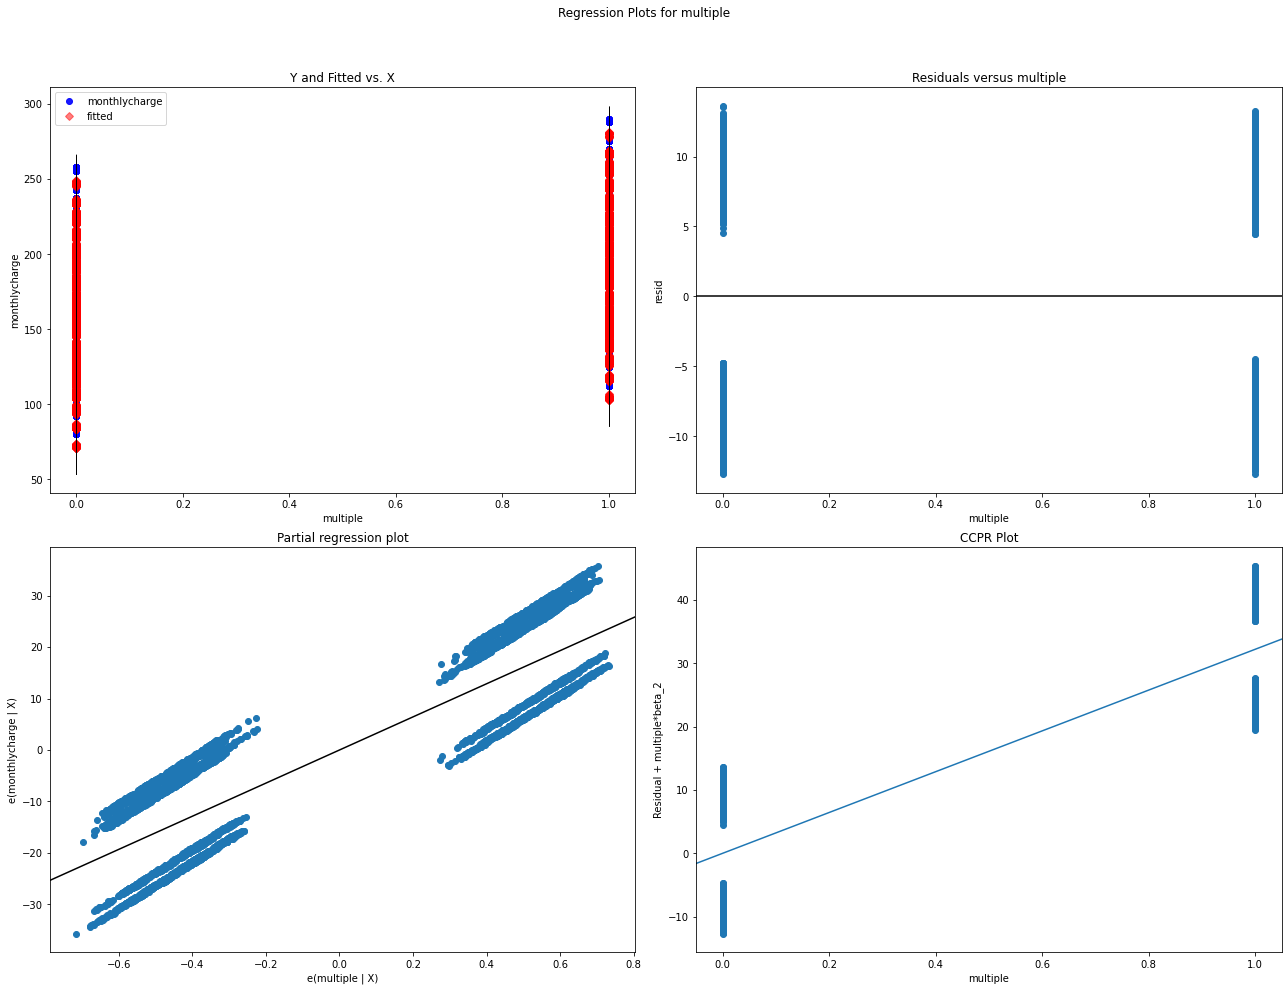

In [62]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'multiple', fig=fig)

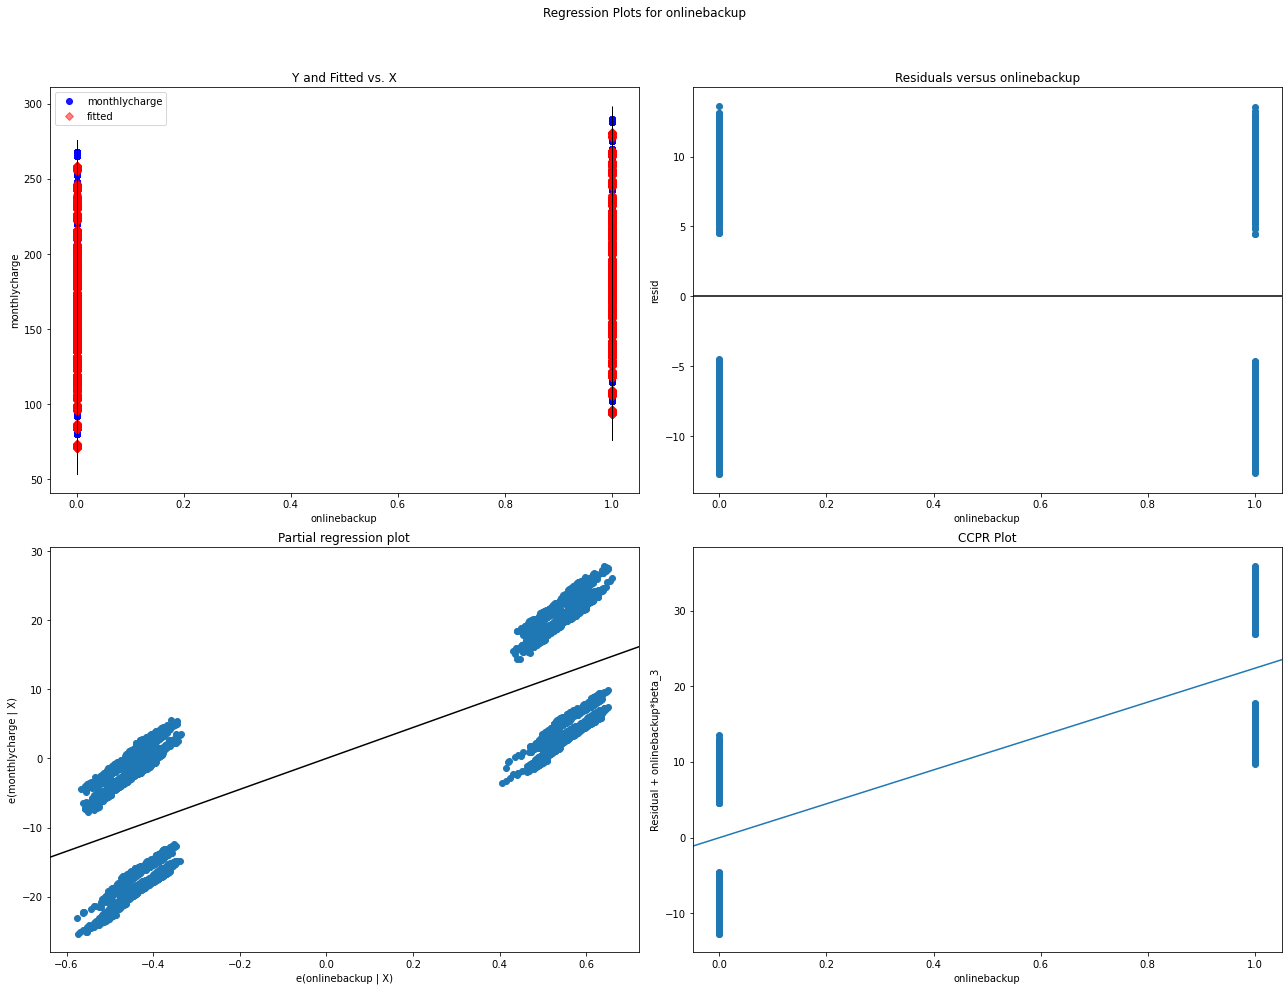

In [63]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'onlinebackup', fig=fig)

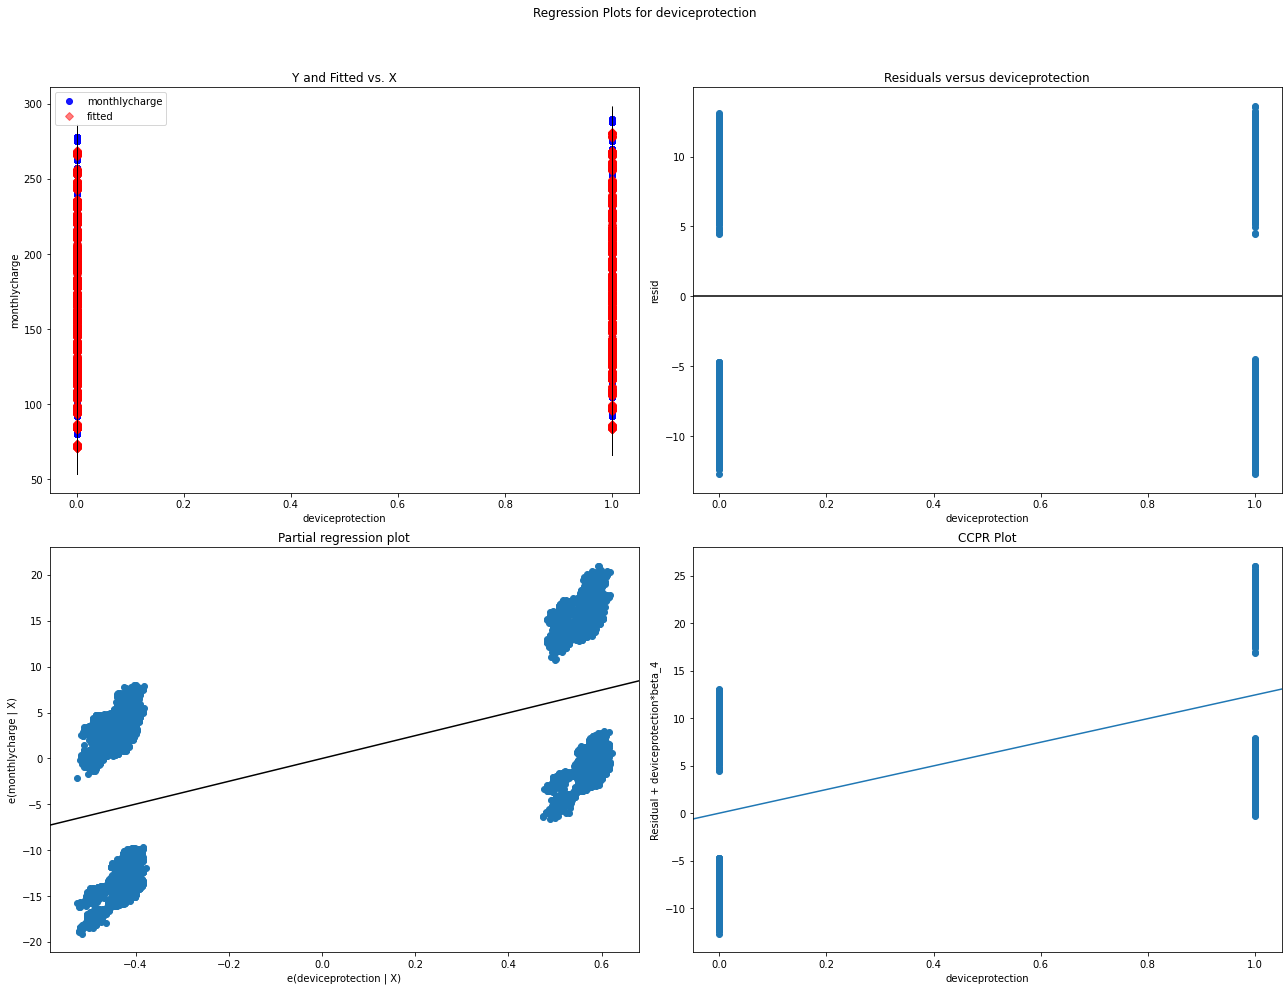

In [64]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'deviceprotection', fig=fig)

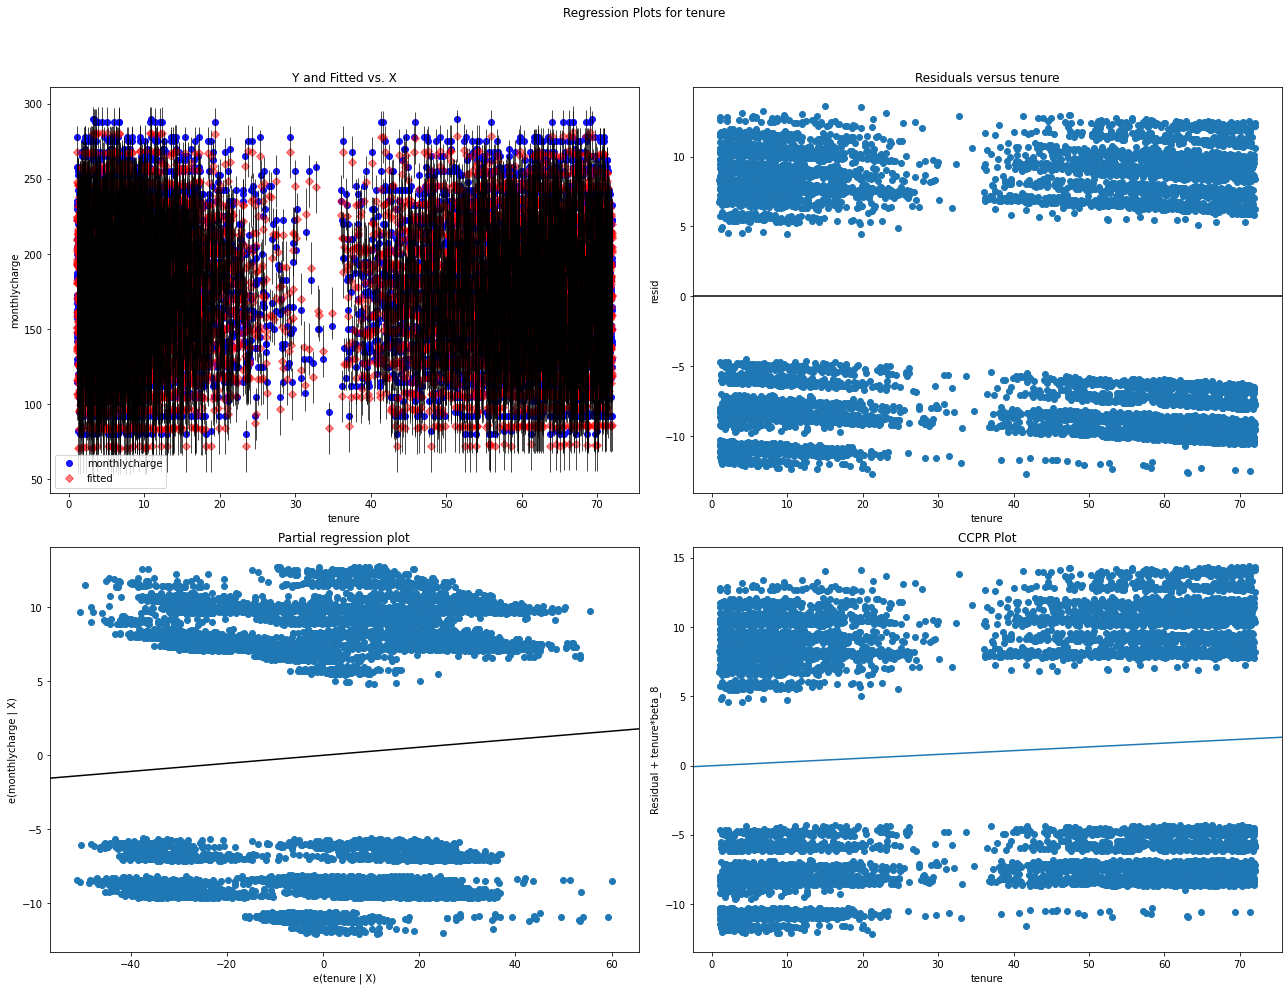

In [65]:
import statsmodels.api as sm
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'tenure', fig=fig)

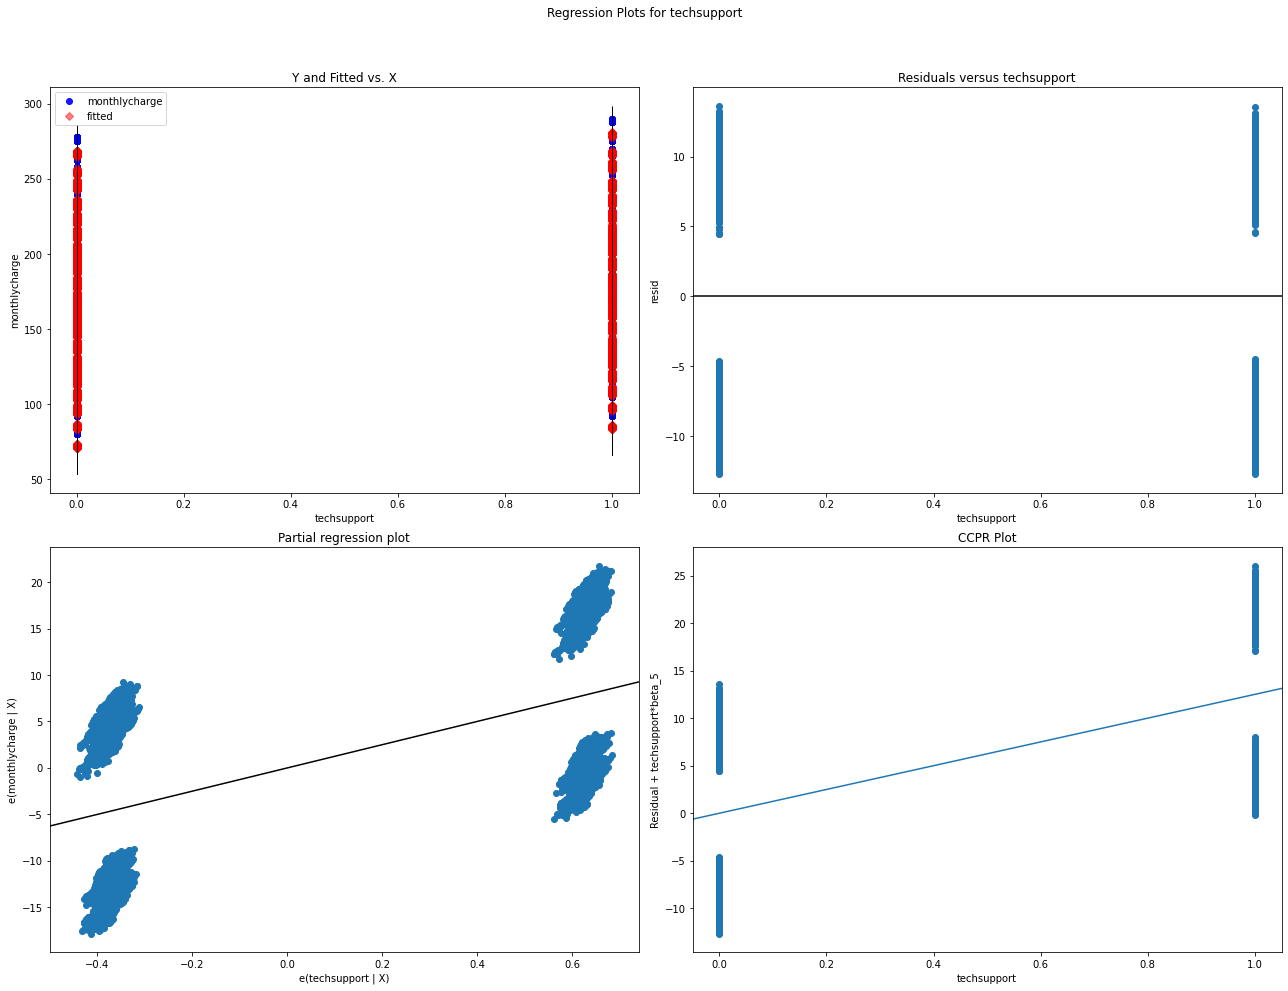

In [66]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'techsupport', fig=fig)

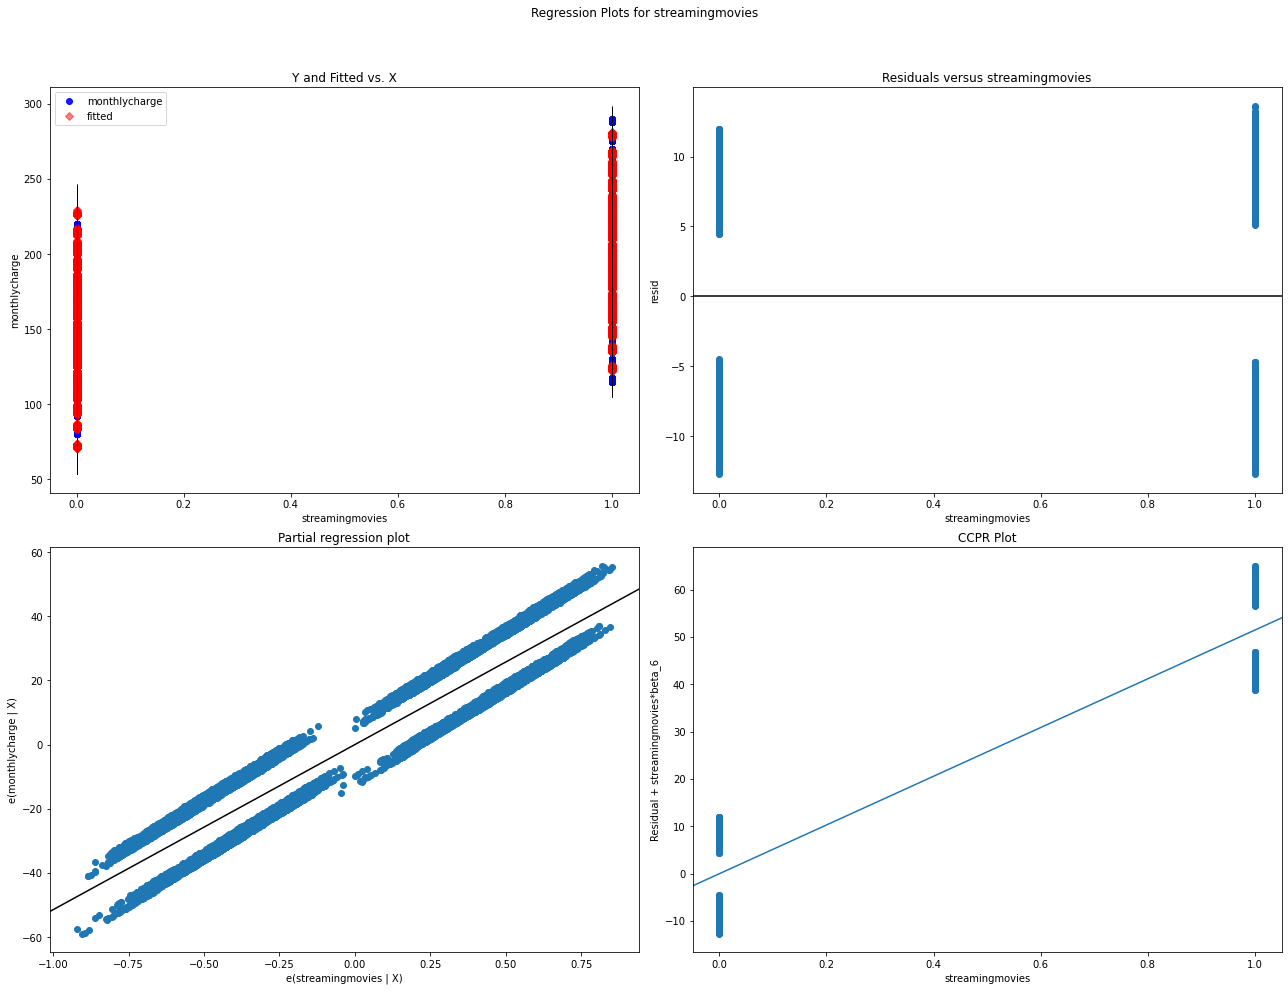

In [67]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'streamingmovies', fig=fig)

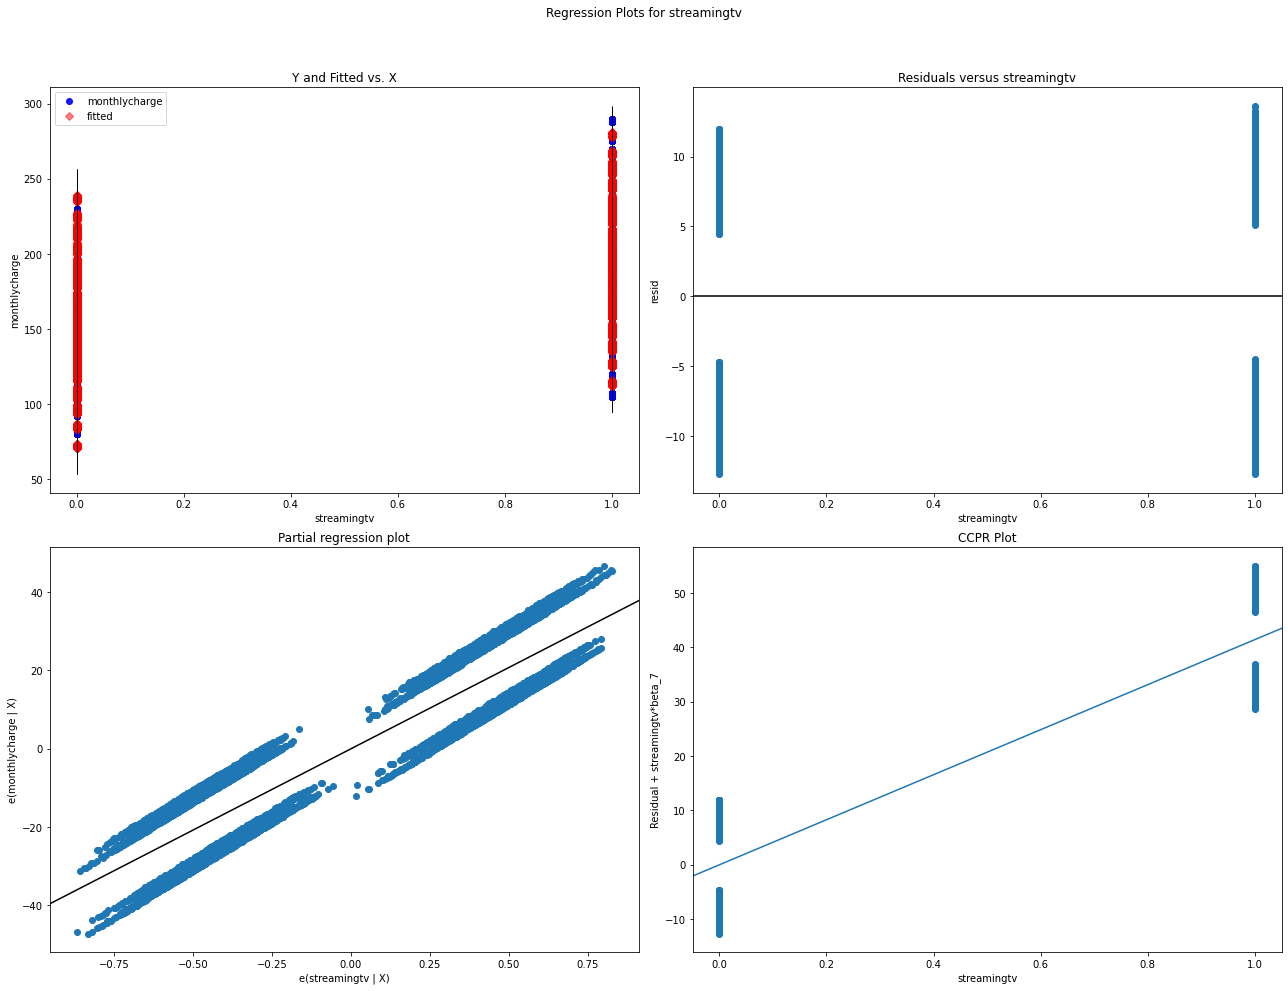

In [68]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'streamingtv', fig=fig)

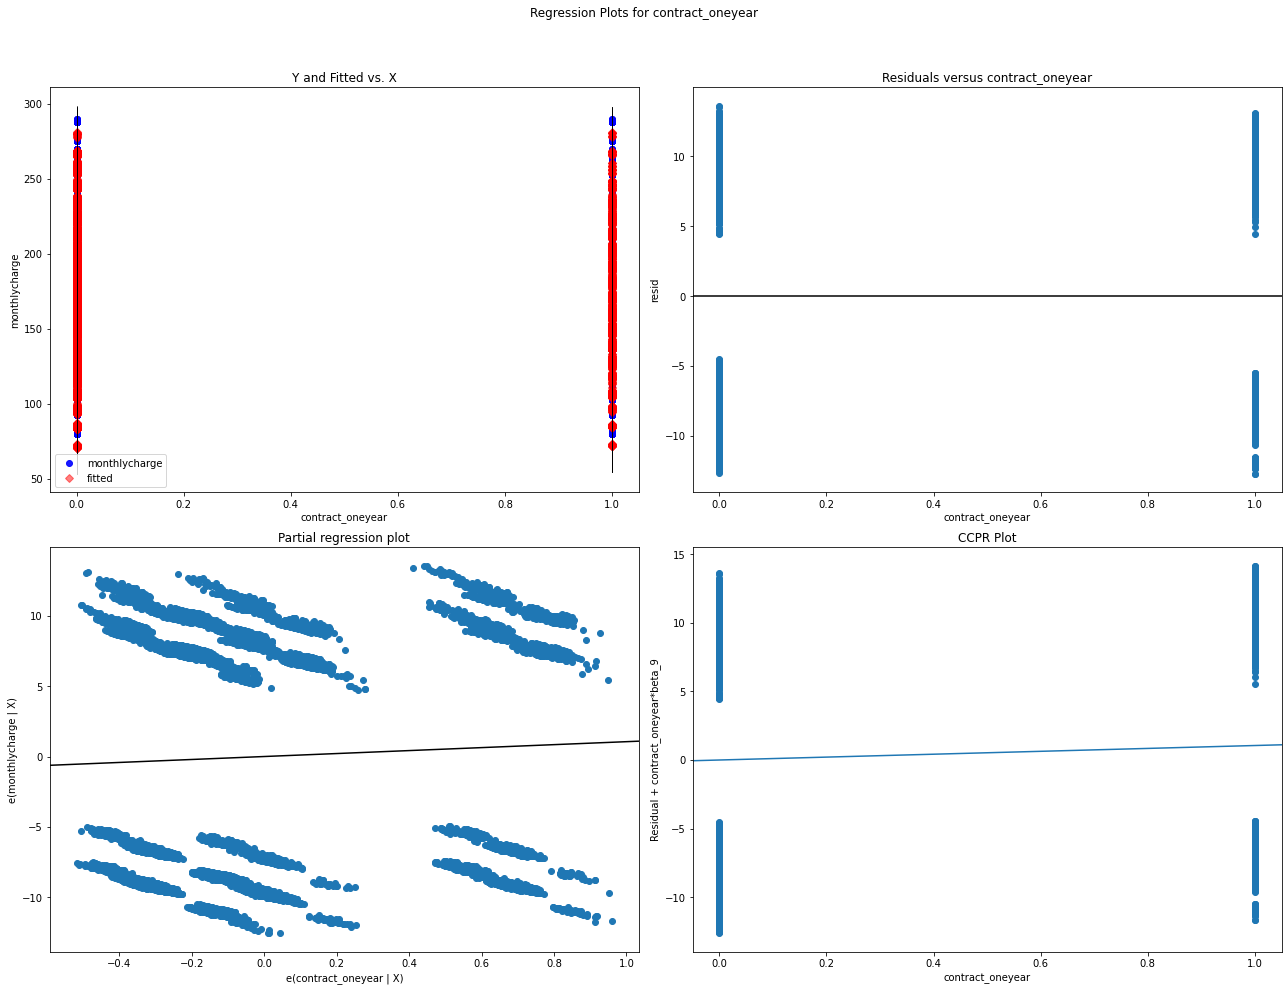

In [69]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'contract_oneyear', fig=fig)

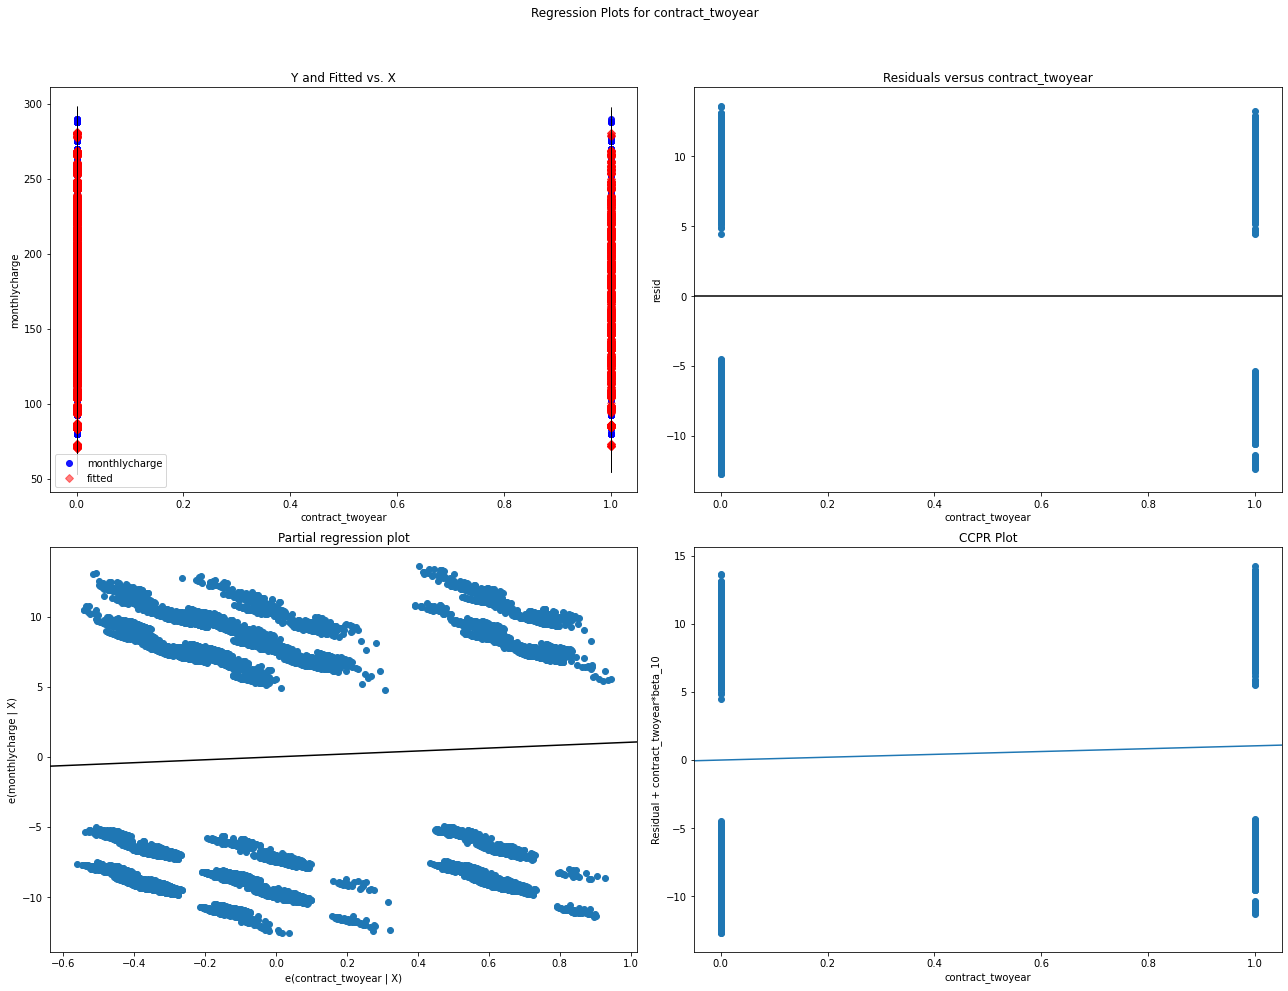

In [70]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'contract_twoyear', fig=fig)

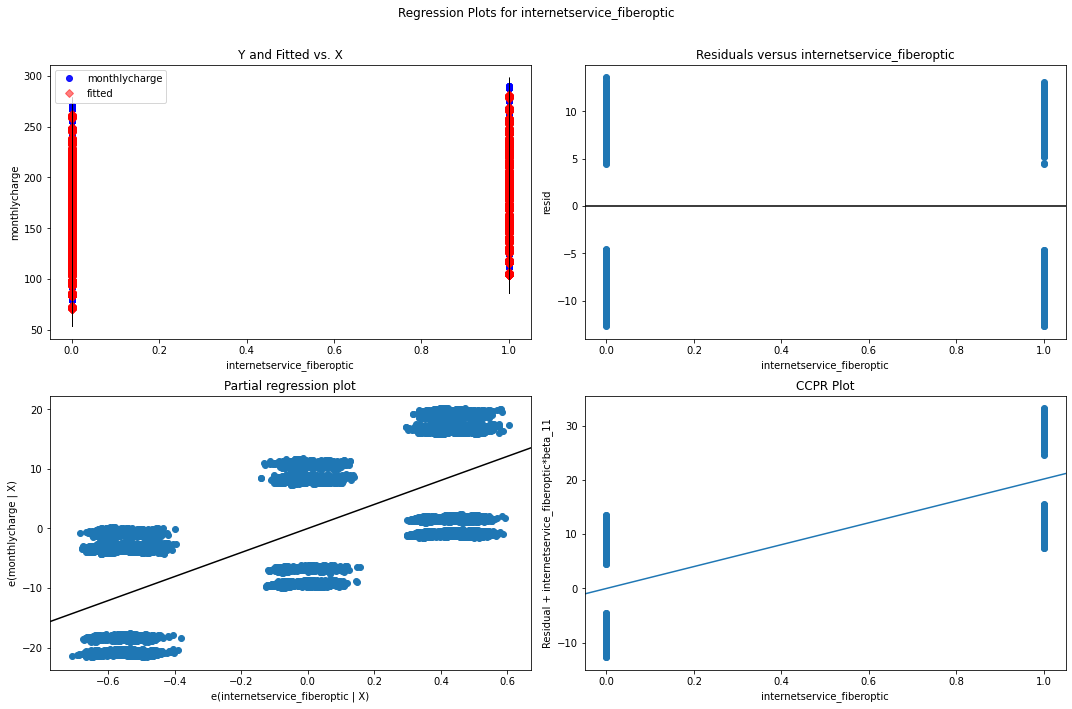

In [71]:
fig= plt.figure(figsize=(15, 10))
fig=sm.graphics.plot_regress_exog(model, 'internetservice_fiberoptic', fig=fig)

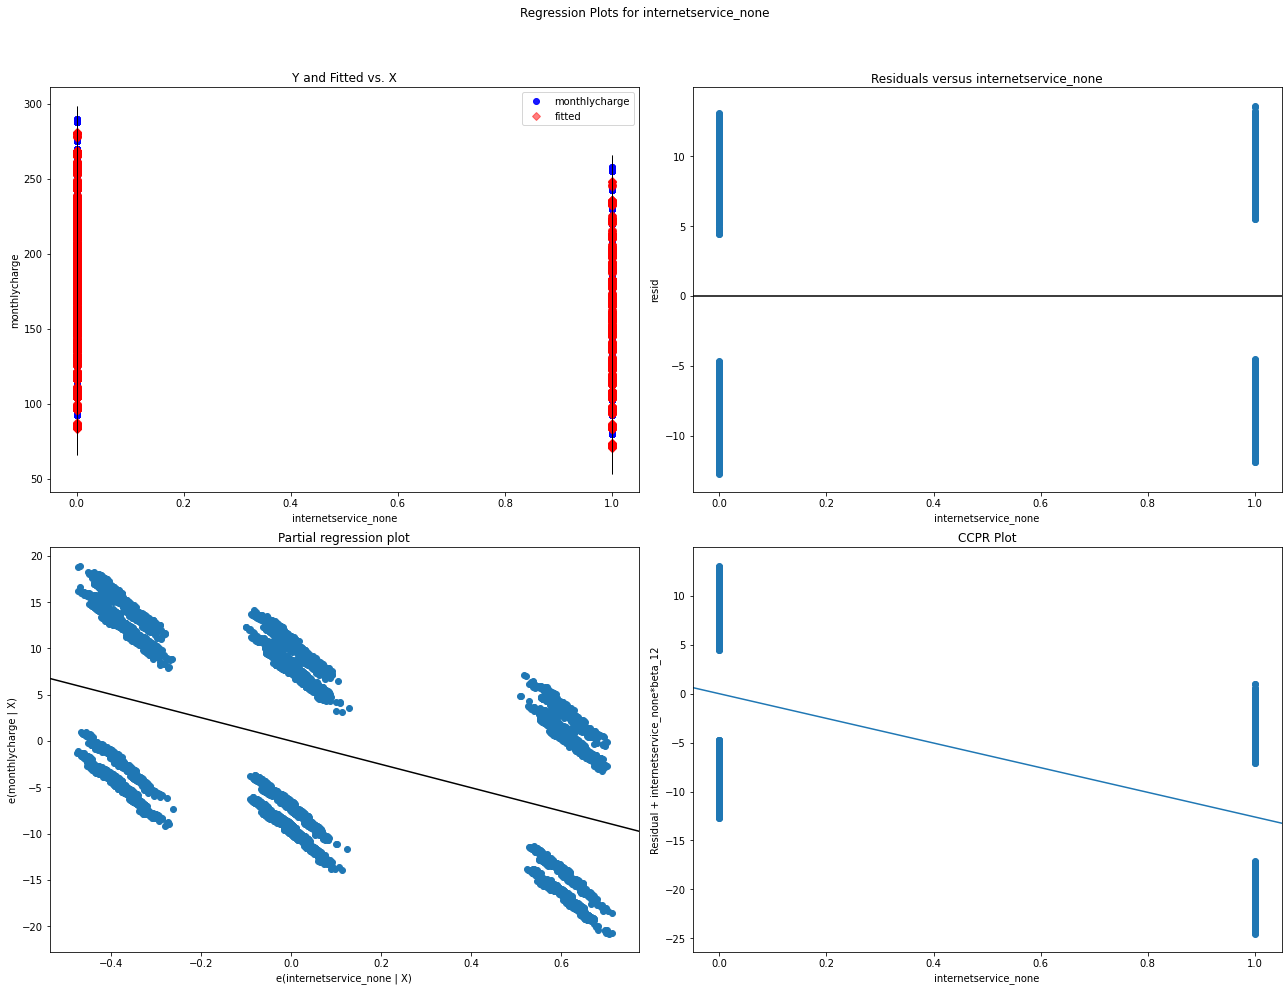

In [72]:
fig= plt.figure(figsize=(18, 14))
fig=sm.graphics.plot_regress_exog(model, 'internetservice_none', fig=fig)

C:\Users\Nicole\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


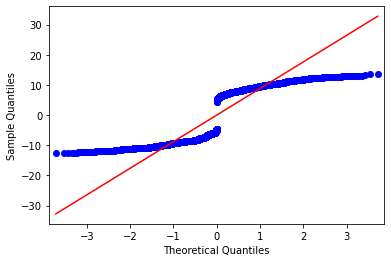

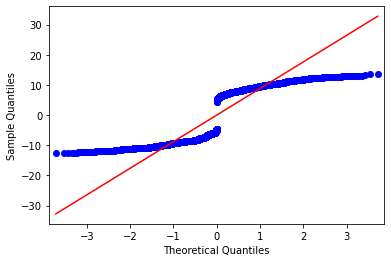

In [73]:
#QQ Plot
sm.qqplot(model.resid, line='s')

In [74]:
df_clean.to_csv(r'C:\Users\Nicole\Desktop\D208\prepared_data.csv')